In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
df_credit = pd.read_csv("german_credit_data.csv",index_col=0)

# Understanding data

In [2]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
#Searching for Missings,type of data and also known the shape of data
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [4]:
#Looking unique values
print(df_credit.nunique())
#Looking the data
print(df_credit.head())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64
   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


# **4. Some explorations:** <a id="Explorations"></a> <br>

- Starting by distribuition of column Age.
- Some Seaborn graphical
- Columns crossing



In [5]:
!pip install plotly

You should consider upgrading via the 'c:\users\harsshh wankhayday\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


<h2>Let's start looking through target variable and their distribuition</h2>

In [6]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

I will try implement some interactive visuals in my Kernels, this will be the first, inspired in Alexader's Kernel and I will also continue implementing plotly and bokeh in my Kerne

In [7]:
df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<h2>Creating an categorical variable to handle with the Age variable </h2>

In [9]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

<h2>I will now Look the distribuition of Housing own and rent by Risk</h2>


In [10]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

we can see that the own and good risk have a high correlation

<h3>Distribuition of Credit Amount by Housing</h3>

Interesting moviments! Highest values come from category "free" and we have a different distribuition by Risk

<h2>Looking the diference by Sex</h2>

In [11]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"],
    y = df_credit[df_credit["Risk"]== 'good']["Credit amount"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"],
    y = df_credit[df_credit["Risk"]== 'bad']["Credit amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<b> How can I set the boxplots in different places? how can I use the same legend to both graphs?</b>

I will create categories of Age and look the distribuition of Credit Amount by Risk...


I will do some explorations through the Job
- Distribuition
- Crossed by Credit amount
- Crossed by Age

In [12]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Job"].value_counts().values,
    name='Good credit Distribuition'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Job"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Job Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

Looking the distribuition of Credit Amont

In [13]:
import plotly.figure_factory as ff

import numpy as np

# Add histogram data
x1 = np.log(df_good['Credit amount']) 
x2 = np.log(df_bad["Credit amount"])

# Group data together
hist_data = [x1, x2]

group_labels = ['Good Credit', 'Bad Credit']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

Distruibution of Saving accounts by Risk

In [15]:
from plotly import tools
import numpy as np
import plotly.graph_objs as go

count_good = go.Bar(
    x = df_good["Saving accounts"].value_counts().index.values,
    y = df_good["Saving accounts"].value_counts().values,
    name='Good credit'
)
count_bad = go.Bar(
    x = df_bad["Saving accounts"].value_counts().index.values,
    y = df_bad["Saving accounts"].value_counts().values,
    name='Bad credit'
)


box_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Credit amount"],
    name='Good credit'
)
box_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Credit amount"],
    name='Bad credit'
)

scat_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Age"],
    name='Good credit'
)
scat_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Age"],
    name='Bad credit'
)

data = [scat_1, scat_2, box_1, box_2, count_good, count_bad]

fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Count Saving Accounts','Credit Amount by Savings Acc', 
                                          'Age by Saving accounts'))

fig.append_trace(count_good, 1, 1)
fig.append_trace(count_bad, 1, 1)

fig.append_trace(box_2, 1, 2)
fig.append_trace(box_1, 1, 2)

fig.append_trace(scat_1, 2, 1)
fig.append_trace(scat_2, 2, 1)



fig['layout'].update(height=700, width=800, title='Saving Accounts Exploration', boxmode='group')

py.iplot(fig, filename='combined-savings')


c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



How can I better configure the legends?  I am trying to substitute the graph below, so how can I use the violinplot on subplots of plotly?

Pretty and interesting distribution...

Duration of the loans distribuition and density

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



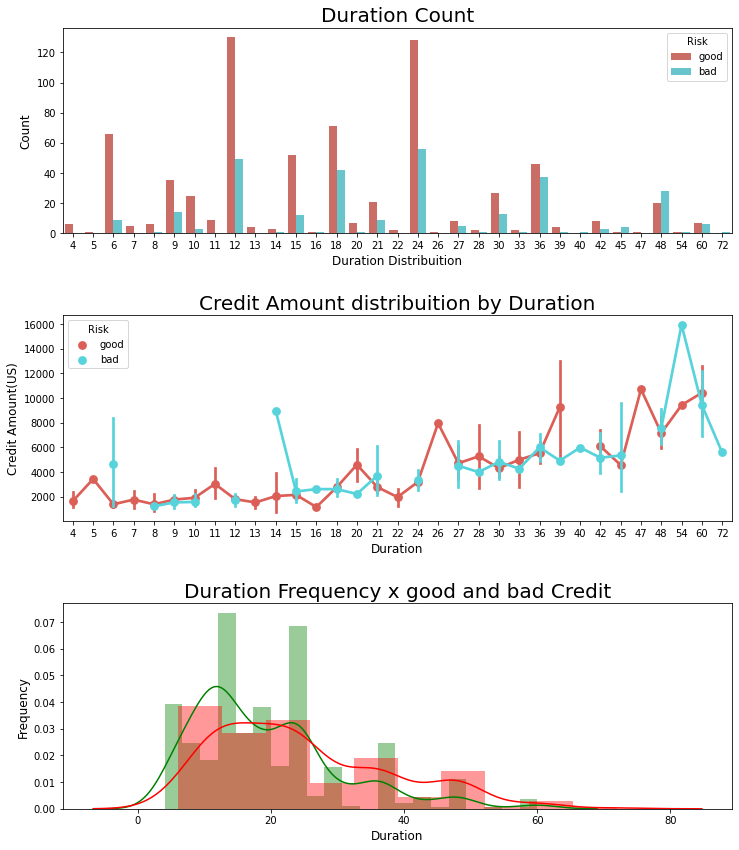

In [17]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Duration", data=df_credit, 
              palette="hls",  hue = "Risk")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Duration", y ="Credit amount",data=df_credit,
                   hue="Risk", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df_good["Duration"], color='g')
g2 = sns.distplot(df_bad["Duration"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()


Interesting, we can see that the highest duration have the high amounts. <br>
The highest density is between [12 ~ 18 ~ 24] months<br>
It all make sense.


<h2> Checking Account variable </h2>

First, let's look the distribuition 

In [18]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Checking account"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Checking account"].value_counts().values,
    name='Good credit Distribuition' 
    
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Checking account"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Checking account"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Checking accounts Distribuition',
    xaxis=dict(title='Checking accounts name'),
    yaxis=dict(title='Count'),
    barmode='group'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename = 'Age-ba', validate = False)

## Create variable Dummies of the values

In [22]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

## Transforming the data into Dummy variables

In [23]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

## Deleting the old features

In [24]:
#Excluding the missing columns
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']

# **6. Preprocessing:** <a id="Preprocessing"></a> <br>
- Importing ML librarys
- Setting X and y variables to the prediction
- Splitting Data


In [25]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [26]:
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])

In [27]:
df_credit["Risk_bad"].sum()

300

In [28]:
#Creating the X and y variables
X = df_credit.drop('Risk_bad', 1).values
y = df_credit["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=df_credit["Risk_bad"])

C:\Users\HARSSH~1\AppData\Local\Temp/ipykernel_3448/2926097931.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [29]:
X.shape, y.shape

((1000, 24), (1000,))

# **7.1 Model 1 :** <a id="Modelling 1"></a> <br>
- Using Random Forest and grid search cv to predictict the credit score 
- Some of Validation Parameters

In [30]:
X_train.shape

(750, 24)

In [31]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5,None],
              "n_estimators":[3,5,10,25],
              "max_features": [4,7,15]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.067 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.000 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.022 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.067 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.044 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.044 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.000 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.067 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.111 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.022 total time=   0.0s
[CV 1/5] END max_depth=3, max_features

[CV 3/5] END max_depth=5, max_features=7, n_estimators=25;, score=0.111 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=7, n_estimators=25;, score=0.267 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=7, n_estimators=25;, score=0.178 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=15, n_estimators=3;, score=0.200 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=15, n_estimators=3;, score=0.422 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=15, n_estimators=3;, score=0.222 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=15, n_estimators=3;, score=0.200 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=15, n_estimators=3;, score=0.378 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=15, n_estimators=5;, score=0.200 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=15, n_estimators=5;, score=0.356 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=15, n_estimators=5;, score=0.267 total time=   0.0s

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, None], 'max_features': [4, 7, 15],
                         'n_estimators': [3, 5, 10, 25]},
             scoring='recall', verbose=4)

In [32]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.43555555555555553
{'max_depth': None, 'max_features': 15, 'n_estimators': 5}


In [33]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=15, random_state=2)

In [34]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.732


[[149  26]
 [ 41  34]]


0.4722222222222222


# Logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [39]:
#Seting the Hyper Parameters
param_grid_logistic = {"penalty": ['l1','l2','elasticnet','none'],
              "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

#Creating the classifier
model_logistic = LogisticRegression()

grid_search_logistic = GridSearchCV(model_logistic, param_grid=param_grid_logistic, cv=5, scoring='recall', verbose=4)
grid_search_logistic.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ........penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ........penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ........penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ........penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END ......penalty=l1, solver=liblinear;, score=0.267 total time=   0.0s
[CV 2/5] END ......penalty=l1, solver=liblinear

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 

[CV 4/5] END ...........penalty=l1, solver=saga;, score=0.156 total time=   0.0s
[CV 5/5] END ...........penalty=l1, solver=saga;, score=0.111 total time=   0.0s
[CV 1/5] END ......penalty=l2, solver=newton-cg;, score=0.267 total time=   0.0s
[CV 2/5] END ......penalty=l2, solver=newton-cg;, score=0.511 total time=   0.0s
[CV 3/5] END ......penalty=l2, solver=newton-cg;, score=0.333 total time=   0.0s

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge




[CV 4/5] END ......penalty=l2, solver=newton-cg;, score=0.422 total time=   0.0s
[CV 5/5] END ......penalty=l2, solver=newton-cg;, score=0.289 total time=   0.0s
[CV 1/5] END ..........penalty=l2, solver=lbfgs;, score=0.267 total time=   0.0s
[CV 2/5] END ..........penalty=l2, solver=lbfgs;, score=0.489 total time=   0.0s
[CV 3/5] END ..........penalty=l2, solver=lbfgs;, score=0.311 total time=   0.0s


c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[CV 4/5] END ..........penalty=l2, solver=lbfgs;, score=0.422 total time=   0.0s
[CV 5/5] END ..........penalty=l2, solver=lbfgs;, score=0.311 total time=   0.0s
[CV 1/5] END ......penalty=l2, solver=liblinear;, score=0.267 total time=   0.0s
[CV 2/5] END ......penalty=l2, solver=liblinear;, score=0.489 total time=   0.0s
[CV 3/5] END ......penalty=l2, solver=liblinear;, score=0.333 total time=   0.0s
[CV 4/5] END ......penalty=l2, solver=liblinear;, score=0.422 total time=   0.0s
[CV 5/5] END ......penalty=l2, solver=liblinear;, score=0.289 total time=   0.0s
[CV 1/5] END ............penalty=l2, solver=sag;, score=0.200 total time=   0.0s
[CV 2/5] END ............penalty=l2, solver=sag;, score=0.378 total time=   0.0s
[CV 3/5] END ............penalty=l2, solver=sag;, score=0.178 total time=   0.0s


c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the

[CV 4/5] END ............penalty=l2, solver=sag;, score=0.178 total time=   0.0s
[CV 5/5] END ............penalty=l2, solver=sag;, score=0.156 total time=   0.0s
[CV 1/5] END ...........penalty=l2, solver=saga;, score=0.156 total time=   0.0s
[CV 2/5] END ...........penalty=l2, solver=saga;, score=0.289 total time=   0.0s
[CV 3/5] END ...........penalty=l2, solver=saga;, score=0.156 total time=   0.0s
[CV 4/5] END ...........penalty=l2, solver=saga;, score=0.156 total time=   0.0s
[CV 5/5] END ...........penalty=l2, solver=saga;, score=0.111 total time=   0.0s
[CV 1/5] END penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s


c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\harsshh wankhayday\appdata\local\programs\python\python39\l

[CV 4/5] END penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END ......penalty=e

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[CV 5/5] END ........penalty=none, solver=lbfgs;, score=0.333 total time=   0.0s
[CV 1/5] END ......penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END ......penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END ......penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END ......penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END ......penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END ..........penalty=none, solver=sag;, score=0.200 total time=   0.0s
[CV 2/5] END ..........penalty=none, solver=sag;, score=0.378 total time=   0.0s
[CV 3/5] END ..........penalty=none, solver=sag;, score=0.200 total time=   0.0s
[CV 4/5] END ..........penalty=none, solver=sag;, score=0.200 total time=   0.0s
[CV 5/5] END ..........penalty=none, solver=sag;, score=0.156 total time=   0.0s
[CV 1/5] END .........penalty=none, solver=saga;, score=0.156 total time=   0.0s


c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the

[CV 2/5] END .........penalty=none, solver=saga;, score=0.289 total time=   0.0s
[CV 3/5] END .........penalty=none, solver=saga;, score=0.156 total time=   0.0s
[CV 4/5] END .........penalty=none, solver=saga;, score=0.156 total time=   0.0s
[CV 5/5] END .........penalty=none, solver=saga;, score=0.111 total time=   0.0s


c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [       nan        nan 0.36888889        nan 0.17333333 0.36444444
 0.36       0.36       0.21777778 0.17333333        nan        nan
        nan        nan        nan 0.38222222 0.39111111        nan
 0.22666667 0.17333333]

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refe

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall', verbose=4)

In [40]:
print(grid_search_logistic.best_score_)
print(grid_search_logistic.best_params_)

0.3911111111111111
{'penalty': 'none', 'solver': 'lbfgs'}


In [42]:
lr=LogisticRegression(penalty='none', solver='lbfgs')
lr.fit(X_train,y_train)

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(penalty='none')

In [43]:
# Printing the Training Score
print("Training score data: ")
print(lr.score(X_train, y_train))

Training score data: 
0.7546666666666667


In [45]:
y_pred_logistic = lr.predict(X_test)

print(accuracy_score(y_test,y_pred_logistic))
print("\n")
print(classification_report(y_test, y_pred_logistic))

0.744


              precision    recall  f1-score   support

           0       0.79      0.87      0.83       175
           1       0.60      0.45      0.52        75

    accuracy                           0.74       250
   macro avg       0.69      0.66      0.67       250
weighted avg       0.73      0.74      0.73       250



In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest

# SMOTE Analysis


In [47]:
!pip install imbalanced-learn

You should consider upgrading via the 'c:\users\harsshh wankhayday\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [48]:
import imblearn

In [49]:
oversample=imblearn.over_sampling.SMOTE()
X_train,y_train=oversample.fit_resample(X_train,y_train)

In [50]:
X_train.shape

(1050, 24)

In [51]:
smote_model_log=LogisticRegression(penalty='none', solver='lbfgs')

In [53]:
smote_model_log.fit(X_train,y_train)

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(penalty='none')

In [54]:
y_pred_smote=smote_model_log.predict(X_test)

In [55]:
print(accuracy_score(y_test,y_pred_smote))
print("\n")
print(confusion_matrix(y_test, y_pred_smote))

0.68


[[117  58]
 [ 22  53]]
